# Analysis of models

We have different sets of reconstructed models.

- **no_constr**: no soft constraints included. This is the ideal, but not all metabolites were produced.
- **constr0_1, constr0_5**: Will likely add reactions needed to support the phenotype, but it is a biased approach. May overpredict the amount of models carrying the ability. 


**Strategy**

1. Find the difference between the models
2. **Selection**: The models that required the least amount of changes (symmetric difference) to acquire the desired phenotype.



In [30]:
import pandas as pd
import reframed
import os
import json

import functions.translation_dicts as translation_dicts

In [31]:
compounds_dict, source_dict,substrate_dict, gas_sheet_dict, community_dict = translation_dicts.translation_dicts()

**Load data**

In [32]:
# First version of oft constraints which shows all products produced by a community member.
with open("output/community_production.json") as json_file:
    community_production = json.load(json_file)

MAG2community_id= pd.read_csv("output/MAG2community_id.tsv",sep="\t",header=None,index_col=0)
MAG2community_id

,1
0,
CH13-bin.12,CD_A
CH13-bin.11,CD_A
CH13-bin.4,CD_A
CH13-bin.14,CD_A
CH13-bin.25,CD_A
...,...
CH1-bin.5,M_P
CH1-bin.0,M_P
CH3-bin.2,M_X


**Load models made without soft constraints**

In [33]:
directory = os 

directory = os.fsencode("output/GEMs/GEMs_no_constraints/")

GEMs_dict = {"no_constr":{}}
for file in os.listdir(directory):
    
    filename = os.fsdecode(file)
    if filename.endswith(".xml"): 
        print(filename)
        GEMs_dict["no_constr"][filename[:-4]]= reframed.load_cbmodel("output/GEMs/GEMs_no_constraints/"+filename)
        continue
    else:
        continue

CH9-bin.8.xml
CH7-bin.24.xml
CH7-bin.18.xml
CH15-bin.7.xml
CH13-bin.10.xml
CH13-bin.0.xml
CH1-bin.4.xml
CH1-bin.5.xml
CH13-bin.1.xml
CH13-bin.11.xml
CH15-bin.6.xml
CH7-bin.2.xml
CH7-bin.25.xml
CH15-bin.4.xml
CH15-bin.18.xml
CH13-bin.13.xml
CH1-bin.10.xml
CH1-bin.7.xml
CH1-bin.6.xml
CH13-bin.2.xml
CH13-bin.12.xml
CH15-bin.5.xml
CH7-bin.1.xml
CH15-bin.1.xml
CH13-bin.16.xml
CH13-bin.6.xml
CH1-bin.2.xml
CH1-bin.3.xml
CH13-bin.17.xml
CH15-bin.0.xml
CH15-bin.20.xml
CH7-bin.4.xml
CH7-bin.23.xml
CH7-bin.21.xml
CH7-bin.6.xml
CH15-bin.22.xml
CH15-bin.2.xml
CH1-bin.1.xml
CH1-bin.0.xml
CH13-bin.4.xml
CH13-bin.14.xml
CH15-bin.3.xml
CH15-bin.23.xml
CH7-bin.20.xml
CH8-bin.8.xml
CH8-bin.9.xml
CH8-bin.27.xml
CH8-bin.25.xml
CH14-bin.4.xml
CH8-bin.20.xml
CH14-bin.1.xml
CH8-bin.21.xml
CH14-bin.2.xml
CH8-bin.22.xml
CH8-bin.0.xml
CH8-bin.12.xml
CH8-bin.2.xml
CH8-bin.11.xml
CH8-bin.29.xml
CH8-bin.7.xml
CH8-bin.6.xml
CH3-bin.2.xml
CH8-bin.14.xml
CH8-bin.16.xml
CH3-bin.0.xml
CH8-bin.4.xml
CH8-bin.5.xml
CH3-bin

**Load models made with soft constraints**

In [34]:
directories = {"constr_0_0_1":"output/GEMs/GEMs_soft_constraints_score_0.01/",
               "constr0_1":"output/GEMs/GEMs_soft_constraints_score_0.1/",
              #"constr0_5":"output/GEMs/GEMs_soft_constraints_score_0.5/"
              }

for id_,directory_str in directories.items():
    print(id_)
    
    directory = os 
    directory = os.fsencode("output/GEMs/GEMs_soft_constraints_score_0.1/")

    GEMs_dict[id_] = {}
    for file in os.listdir(directory):

        filename = os.fsdecode(file)
        if filename.endswith(".xml"): 
            print("\t"+filename)
            GEMs_dict[id_][filename[:-4]]= reframed.load_cbmodel(directory_str+filename)
            continue
        else:
            continue

constr_0_0_1
	CH7-bin.18.xml
	CH15-bin.7.xml
	CH13-bin.0.xml
	CH1-bin.4.xml
	CH13-bin.1.xml
	CH13-bin.11.xml
	CH15-bin.6.xml
	CH7-bin.2.xml
	CH13-bin.13.xml
	CH1-bin.10.xml
	CH1-bin.6.xml
	CH13-bin.2.xml
	CH13-bin.12.xml
	CH15-bin.5.xml
	CH7-bin.1.xml
	CH15-bin.1.xml
	CH1-bin.3.xml
	CH13-bin.17.xml
	CH15-bin.0.xml
	CH7-bin.4.xml
	CH7-bin.23.xml
	CH7-bin.6.xml
	CH15-bin.22.xml
	CH15-bin.2.xml
	CH1-bin.1.xml
	CH13-bin.4.xml
	CH13-bin.14.xml
	CH15-bin.23.xml
	CH7-bin.20.xml
	CH8-bin.8.xml
	CH8-bin.9.xml
	CH8-bin.25.xml
	CH14-bin.4.xml
	CH14-bin.1.xml
	CH8-bin.21.xml
	CH14-bin.2.xml
	CH8-bin.22.xml
	CH8-bin.2.xml
	CH8-bin.29.xml
	CH8-bin.7.xml
	CH8-bin.6.xml
	CH3-bin.2.xml
	CH8-bin.14.xml
	CH8-bin.16.xml
	CH3-bin.0.xml
	CH8-bin.5.xml
	CH3-bin.1.xml
	CH8-bin.17.xml
	CH7-bin.11.xml
	CH9-bin.1.xml
	CH15-bin.12.xml
	CH13-bin.25.xml
	CH15-bin.13.xml
	CH9-bin.0.xml
	CH7-bin.12.xml
	CH9-bin.2.xml
	CH7-bin.9.xml
	CH15-bin.10.xml
	CH7-bin.8.xml
	CH7-bin.13.xml
	CH7-bin.17.xml
	CH15-bin.8.xml
	CH7-b

### Find difference between models made with different reconstruction parameters

- new_rxns_count = number of new reactions
- symmetric_diff = number of lost reactions + number of new reactions 

In [35]:
relevant_MAGs = GEMs_dict["constr0_1"].keys()


In [36]:
difference_dict ={}
    
for constr_status in ["constr_0_0_1","constr0_1"]:#,"constr0_5"]:

    difference_dict[constr_status] = {}

    difference_dict[constr_status]["new_rxns_count"] = {}
    difference_dict[constr_status]["symmetric_diff"] = {}

    for MAG in relevant_MAGs:
        
        model_const = GEMs_dict[constr_status][MAG]
        model_no_constr = GEMs_dict["no_constr"][MAG]

        # number of new reactions in new model
        difference_dict[constr_status]["new_rxns_count"][MAG]=len(set(model_const.reactions)-set(model_no_constr.reactions))
        # reaction symmetric difference
        difference_dict[constr_status]["symmetric_diff"][MAG]=len(set(model_const.reactions).symmetric_difference(set(model_no_constr.reactions)))




In [37]:
diff_df = pd.DataFrame.from_dict({(constr_status,diff_type):difference_dict[constr_status][diff_type] 
                        for constr_status in difference_dict.keys() 
                        for diff_type in difference_dict[constr_status].keys()})
diff_df

constr_0_0_1                     constr0_1               
            new_rxns_count symmetric_diff new_rxns_count symmetric_diff
CH7-bin.18             162            238            185            278
CH15-bin.7              45            112             74            140
CH13-bin.0              74            423             59            122
CH1-bin.4               74            138            102            181
CH13-bin.1              58            122             53            127
...                    ...            ...            ...            ...
CH1-bin.8               90            359             71            161
CH1-bin.9               93            304            102            335
CH15-bin.16             31             75             68            317
CH7-bin.15              93            169             98            184
CH9-bin.5               63            121            192            272

[71 rows x 4 columns]

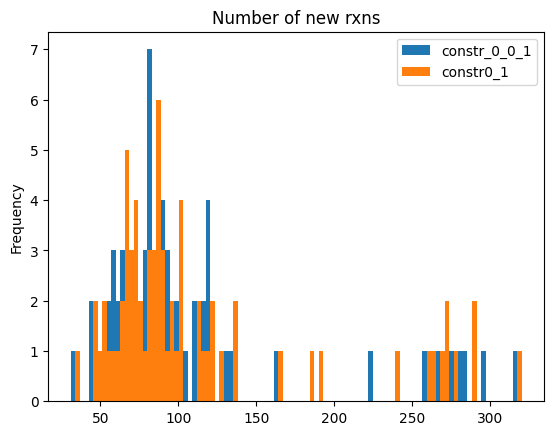

In [38]:
import matplotlib.pyplot as plt
diff_df.xs("new_rxns_count", level=1, axis=1).plot(kind="hist",bins=100)
plt.title("Number of new rxns")
plt.show()

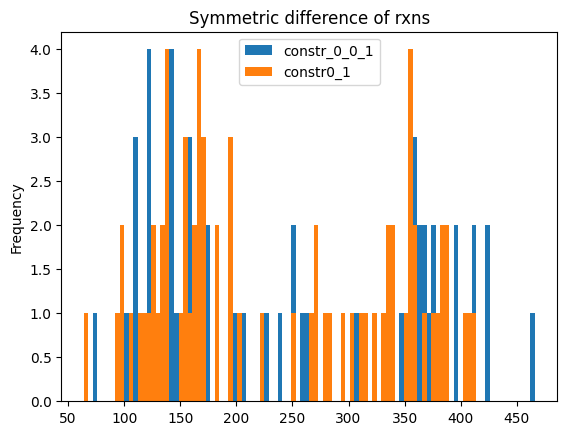

In [39]:
diff_df.xs("symmetric_diff", level=1, axis=1).plot(kind="hist",bins=100)
plt.title("Symmetric difference of rxns")
plt.show()

### Select models: The best candidates to fulfill the community metabolic phenotype 

Here we focus on the most promising sets of reconstructed models. For this we chose:

- **constr0_1**: low soft constraint score will likely lead to addition of fewer reactions
- **no_constr**: no soft constraints included. This is the ideal, but not all metabolites were produced.


**Selection criteria**: The models that required the least amount of changes (symmetric difference) to acquire the desired phenotype.

In [40]:
# change this if you want to study something different.
soft_constraint_selected = "constr0_1"

In [41]:
# NB: This function does NOT confirm that the metabolite is produced.
def best_candidate(SC_rxns,MAGs,diff_df_select):
    """
    Input:
    SC_rxns - list of exchanged metabolites of community (exchange reactions)
    MAGs - list of MAGs in this community
    diff_df_select - dataframe with increase in rxns and symmetric difference
    """
    
    rxn_candidates ={}
    
    # For each exchanged compound find the candidate with lowest score in symmetric_diff
    for rxn in SC_rxns:
        rxn_candidates[rxn]={"MAG":None,"symmetric_diff":1000} # Default
        
        # For each community member
        for MAG in MAGs:
            
            # If reaction is not in model it is not a candidate
            if rxn not in GEMs_dict[soft_constraint_selected][MAG].reactions:
                continue
                
            symmetric_diff = diff_df_select.loc[MAG,"symmetric_diff"]  
            
            # If the symmetric difference is smaller than for the previous candidate
            if symmetric_diff<rxn_candidates[rxn]["symmetric_diff"]:
                rxn_candidates[rxn]["MAG"]=MAG
                rxn_candidates[rxn]["symmetric_diff"]=symmetric_diff
                
    return rxn_candidates

**Find best candidates**

Based on the fact that we expect certain compounds produced, which models created with soft constraints are the best candidates? Through this code we select just one model for each community and compound produced.


In [42]:
diff_df_select = diff_df.xs(soft_constraint_selected,axis=1)

# A new key,value pair for the genome-scale metabolic models from 'soft_constraint_selected' or 'no_costr'
GEMs_dict["adapt"]={}

# An overview of the origin of the models in GEMs_dict["adapt"]={}
GEMs_adapt = {}

rxn_candidates_all = {}

# For each community 
for community_name, community_id in community_dict.items():
    # Find community members
    MAGs = MAG2community_id[MAG2community_id[1]==community_id].index.values
    MAGs = [MAG for MAG in MAGs if MAG in relevant_MAGs] # Only look at 99% best ones.
    
    # Find the exchange reactions representing produced compounds by this community
    soft_constraints = pd.read_csv(f"output/soft_constraints/SC_{community_id}.tsv", header=None, sep="\t")
    SC_rxns = soft_constraints[0].values
    
    # Find best candidate in community for producing each compound
    rxn_candidates = best_candidate(SC_rxns,MAGs,diff_df_select) 
    rxn_candidates_all[community_id]=rxn_candidates
            
    # Create GEMs adapt
    MAGs_best_candidates = set([candidate_dict["MAG"] for rxn,candidate_dict in rxn_candidates.items()])
    
    for MAG in MAGs:
        if MAG in MAGs_best_candidates:
            GEMs_dict["adapt"][MAG]=GEMs_dict[soft_constraint_selected][MAG].copy()
            GEMs_adapt[MAG] = soft_constraint_selected
        else:
            GEMs_dict["adapt"][MAG]=GEMs_dict["no_constr"][MAG].copy()
            GEMs_adapt[MAG] = "no_constr"


Some candidates are quite different from the original model. Here the symmetric diff shows how many reactions are different between the community members. 

In [43]:
best_candidates = pd.DataFrame.from_dict({(community_id,rxn):rxn_candidates_all[community_id][rxn]  
                                          for community_id in rxn_candidates_all.keys() 
                                          for rxn in rxn_candidates_all[community_id].keys()}).transpose()
best_candidates.dropna()

MAG symmetric_diff
CD_A R_EX_ppoh_e   CH13-bin.1            127
     R_EX_h2_e     CH13-bin.4             64
CD_P R_EX_etoh_e  CH15-bin.10            113
     R_EX_ppoh_e   CH15-bin.6            139
CD_X R_EX_etoh_e   CH14-bin.4            202
     R_EX_pta_e    CH14-bin.4            202
     R_EX_ppoh_e   CH14-bin.4            202
     R_EX_h2_e     CH14-bin.4            202
CM_A R_EX_pta_e     CH8-bin.2            134
CM_P R_EX_etoh_e   CH7-bin.20             97
     R_EX_ppoh_e    CH7-bin.4            108
CM_X R_EX_etoh_e    CH9-bin.2             94
     R_EX_for_e     CH9-bin.2             94
     R_EX_h2_e      CH9-bin.2             94
M_P  R_EX_etoh_e    CH1-bin.3            139
     R_EX_for_e     CH1-bin.3            139
     R_EX_ppoh_e    CH1-bin.9            335
M_X  R_EX_etoh_e    CH3-bin.2            119
     R_EX_for_e     CH3-bin.2            119
     R_EX_ibt_e     CH3-bin.2            119
     R_EX_h2_e      CH3-bin.2            119

### Contain reaction: Plot number of models that have the exchange reaction

In [44]:
community_production["M_X"].keys()

dict_keys(['R_EX_ac_e', 'R_EX_etoh_e', 'R_EX_ppa_e', 'R_EX_but_e', 'R_EX_for_e', 'R_EX_ppoh_e', 'R_EX_ival_e', 'R_EX_hxa_e', 'R_EX_ibt_e', 'R_EX_h2_e', 'R_EX_co2_e'])

In [45]:
reactions_added_bool = {"rxns_no_constr":{},"rxns_"+soft_constraint_selected:{},"rxns_adapt":{}} 
    
for community_name, community_id in community_dict.items():
    # Find community members

    MAGs = MAG2community_id[MAG2community_id[1]==community_id].index.values
    MAGs = [MAG for MAG in MAGs if MAG in relevant_MAGs]
        
    # Find produced compounds for this community
    SC_rxns = community_production[community_id].keys()
    for MAG in MAGs:
        # Reactions in models from different reconstruction criteria
        GEM_rxns = set(GEMs_dict["no_constr"][MAG].reactions)
        GEM_soft_rxns = set(GEMs_dict[soft_constraint_selected][MAG].reactions)
        GEM_adapt_rxns =  set(GEMs_dict["adapt"][MAG].reactions)

        # Find intersection between expected exchange reactions and actual exchange reactions.
        reactions_added_bool["rxns_no_constr"][MAG]={rxn: 1 if rxn in set(SC_rxns).intersection(GEM_rxns) else 0 for rxn in SC_rxns}
        reactions_added_bool["rxns_"+soft_constraint_selected][MAG]={rxn: 1 if rxn in set(SC_rxns).intersection(GEM_soft_rxns) else 0 for rxn in SC_rxns}
        reactions_added_bool["rxns_adapt"][MAG]={rxn: 1 if rxn in set(SC_rxns).intersection(GEM_adapt_rxns) else 0 for rxn in SC_rxns}

In [46]:
all_mags_groups = MAG2community_id.groupby(1).groups

In [47]:
dfs_community = {}

for community_name,MAGs in all_mags_groups.items():
    community_dfs = []
    
    for recon_type,bool_dict in reactions_added_bool.items():
        rxns_add_bool_df = pd.DataFrame(bool_dict).transpose()
        rxns_add_bool_df = rxns_add_bool_df[rxns_add_bool_df.index.isin(MAGs)].dropna(axis=1)
        rxns_add_bool_df_sum_df = rxns_add_bool_df.sum()
        rxns_add_bool_df_sum_df = rxns_add_bool_df_sum_df
        rxns_add_bool_df_sum_df.name=recon_type
        
        community_dfs.append(rxns_add_bool_df_sum_df)

    dfs_community[community_name]=pd.concat(community_dfs,axis=1)

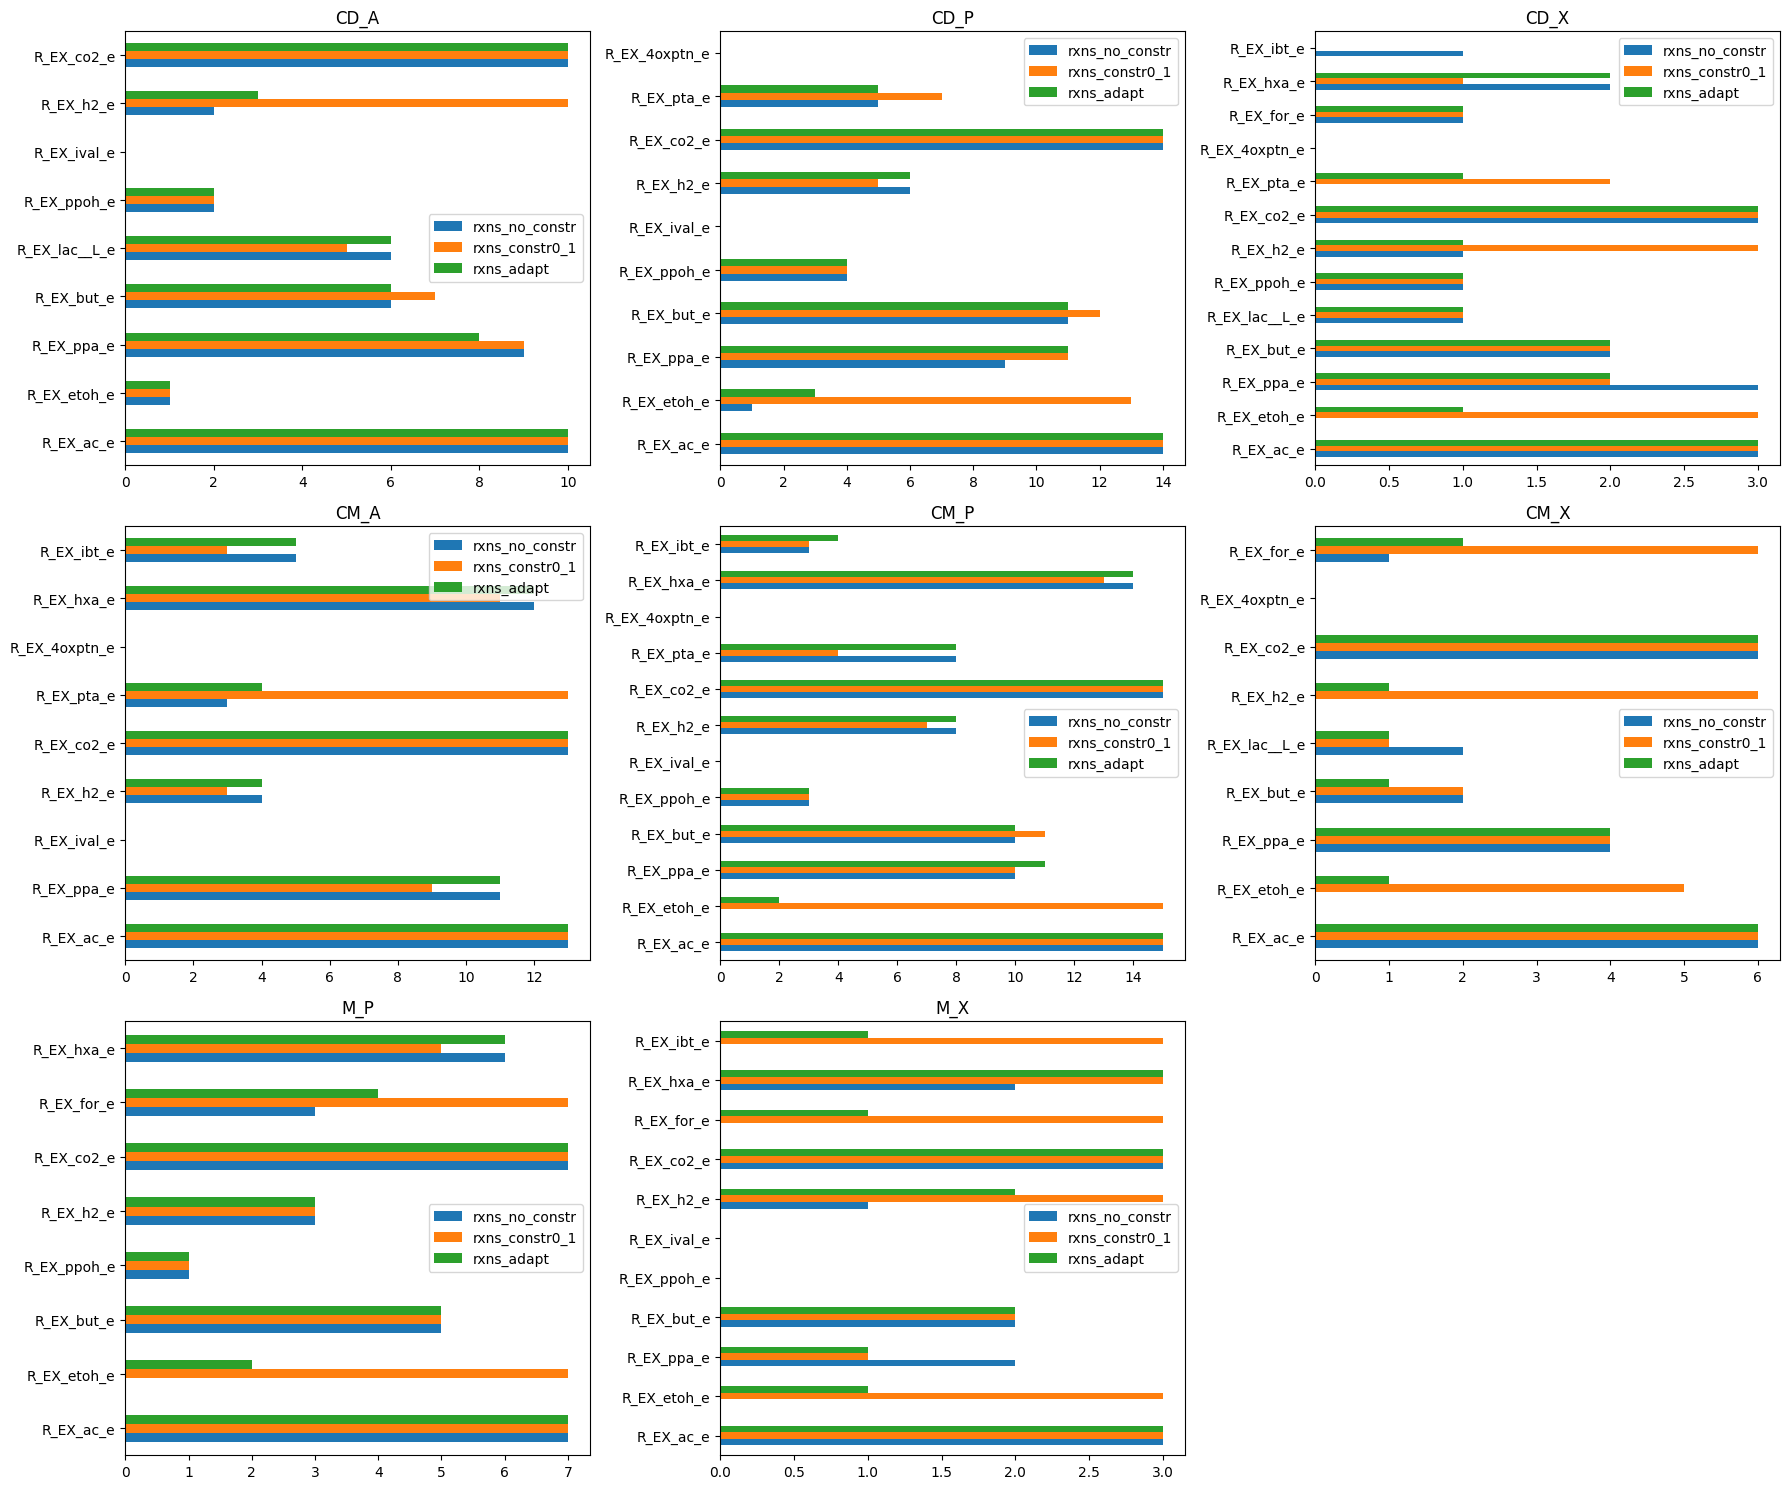

In [48]:
import matplotlib.pyplot as plt
import math

rows = math.ceil(len(dfs_community.keys())/3)
fig, axs = plt.subplots(rows,3, figsize=(18,5*rows))

i = 0

for community,df in dfs_community.items():
    df.plot(kind="barh", ax=axs[math.floor(i/3)][i%3])
    axs[math.floor(i/3)][i%3].title.set_text(community)
    i = i+1
    
axs[2,2].set_axis_off()
fig.tight_layout()


## Produce compound: Find number of models from the "adapted" set that can produce the compound

**Find producers in COMPLETE media**

In [49]:
enrich_groups = MAG2community_id[MAG2community_id.index.isin(relevant_MAGs)].groupby(1).groups

In [50]:
# For each community set the default production to False
comm_producers = {}


for community_id, MAGs in enrich_groups.items():
    rxns_soft_constraints = pd.read_csv(f"output/soft_constraints/SC_{community_id}.tsv", header=None, sep="\t")[0].values
    comm_producers[community_id]= {MAG:{rxn:False for rxn in rxns_soft_constraints} for MAG in MAGs if MAG!="CH15-bin.15"}
    #comm_producers[community_id]= {MAG:{rxn:False for rxn in rxns_soft_constraints} for MAG in MAGs}


In [51]:
for community_id,MAGs in enrich_groups.items():
    rxns_soft_constraints = pd.read_csv(f"output/soft_constraints/SC_{community_id}.tsv", header=None, sep="\t")[0].values

    for MAG in MAGs:
        
        if MAG =="CH15-bin.15":
            continue
        
        model = GEMs_dict["adapt"][MAG]
        complete_env = reframed.Environment.from_model(model)
        complete_env.apply(model,inplace=True)
        
        SC_rxns = community_production[community_id].keys()
        reactions = [rxn for rxn in SC_rxns if rxn in model.reactions]
        print(MAG)

        if len(reactions)!=0:
            sol = reframed.FVA(model,reactions=reactions)

            for rxn,sol_rxn in sol.items():
                comm_producers[community_id][MAG][rxn]=sol_rxn[1]>1e-6
          
        for rxn in set(SC_rxns) - set(reactions):
            comm_producers[community_id][MAG][rxn]=False

CH13-bin.12
CH13-bin.11
CH13-bin.4
CH13-bin.14
CH13-bin.25
CH13-bin.17
CH13-bin.0
CH13-bin.1
CH13-bin.13
CH13-bin.2
CH15-bin.0
CH15-bin.23
CH15-bin.1
CH15-bin.7
CH15-bin.8
CH15-bin.22
CH15-bin.6
CH15-bin.17
CH15-bin.16
CH15-bin.13
CH15-bin.12
CH15-bin.5
CH15-bin.10
CH15-bin.2
CH14-bin.1
CH14-bin.2
CH14-bin.4
CH8-bin.22
CH8-bin.17
CH8-bin.7
CH8-bin.2
CH8-bin.6
CH8-bin.25
CH8-bin.5
CH8-bin.9
CH8-bin.16
CH8-bin.21
CH8-bin.8
CH8-bin.29
CH8-bin.14
CH7-bin.23
CH7-bin.16
CH7-bin.11
CH7-bin.13
CH7-bin.2
CH7-bin.8
CH7-bin.18
CH7-bin.1
CH7-bin.17
CH7-bin.4
CH7-bin.12
CH7-bin.20
CH7-bin.9
CH7-bin.6
CH7-bin.15
CH9-bin.0
CH9-bin.6
CH9-bin.5
CH9-bin.1
CH9-bin.2
CH9-bin.4
CH1-bin.6
CH1-bin.9
CH1-bin.3
CH1-bin.4
CH1-bin.8
CH1-bin.1
CH1-bin.10
CH3-bin.2
CH3-bin.1
CH3-bin.0


In [52]:
dfs_community_count = {community_id:pd.DataFrame(producers_dict).sum(axis=1).rename("all") for community_id,producers_dict in comm_producers.items()}


#### Plotting production

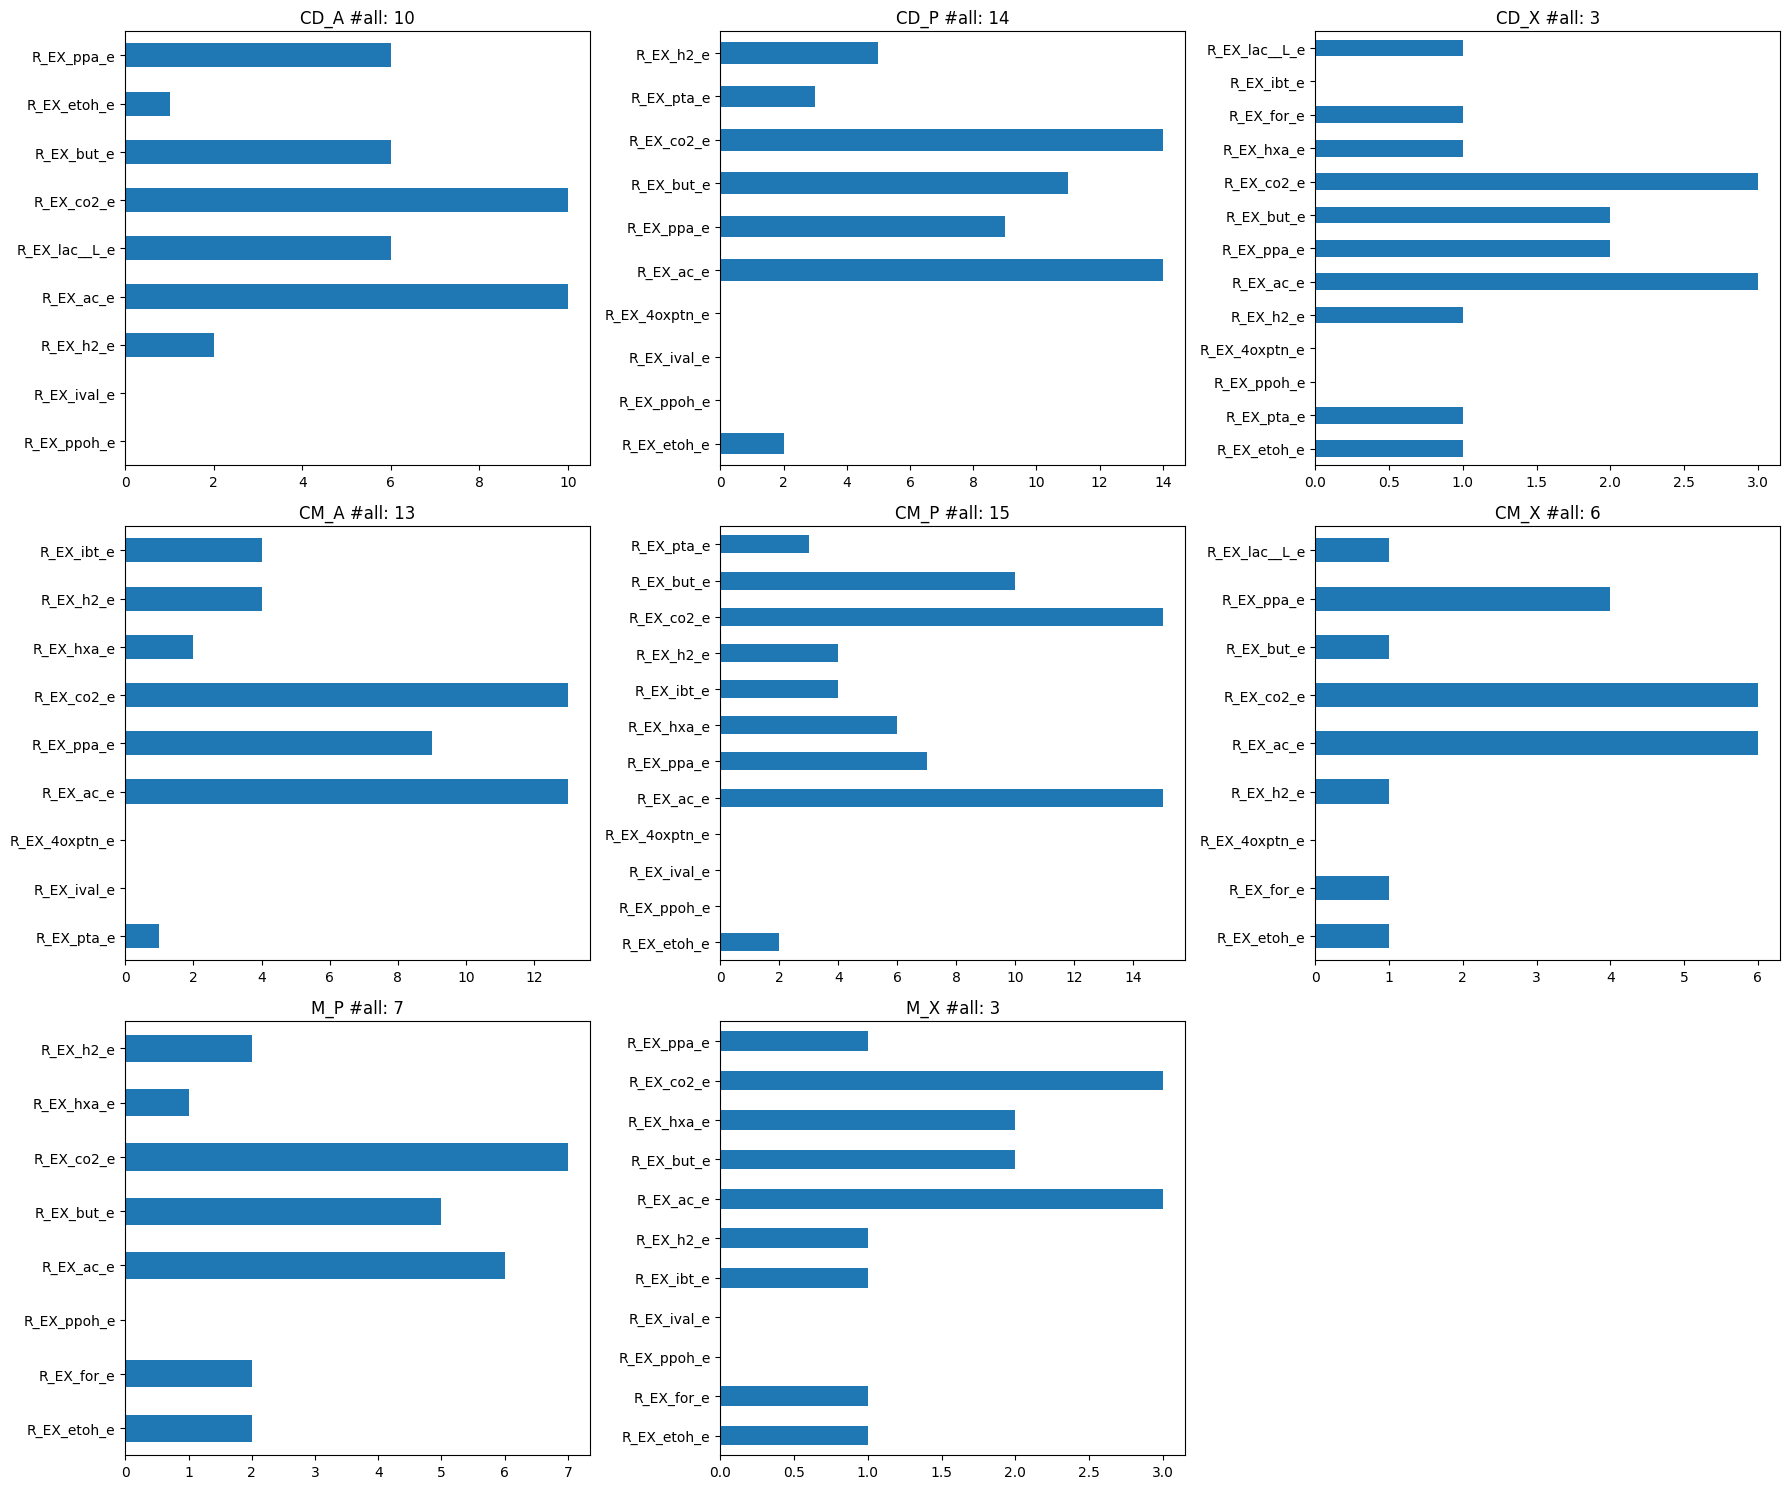

In [53]:
import matplotlib.pyplot as plt
import math

rows = math.ceil(len(dfs_community_count.keys())/3)
fig, axs = plt.subplots(rows,3, figsize=(18,5*rows))

i = 0

for community_id,df in dfs_community_count.items():
    df.plot(kind="barh", ax=axs[math.floor(i/3)][i%3])
    axs[math.floor(i/3)][i%3].title.set_text(community_id+" #all: "+str(len(comm_producers[community_id].keys())))
    i = i+1
    
axs[2,2].set_axis_off()
fig.tight_layout()


### Save data

In [54]:
GEMs_adapt["CH15-bin.15"]="no_constr"

In [55]:
with open("output/GEMs/GEMs_adapt.json", "w") as outfile: 
    json.dump(GEMs_adapt, outfile)

### Save models

In [56]:
GEMs_dict["adapt"]["CH15-bin.15"] = GEMs_dict["no_constr"]["CH15-bin.15"].copy()

In [58]:
for MAG,model in GEMs_dict["adapt"].items():
    reframed.save_cbmodel(model,"output/GEMs/GEMs_adapt/"+MAG+".xml")